In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

In [3]:
new2 = pd.read_csv('data/new2.csv', index_col = 0)

In [4]:
# df.describe() will give you a good matrix of mean, max, and all percentile. Look into the max of the column to point out the outlier if its greater than 75 percentile of values.

new2.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,8191.000000,8190.000000,8191.000000,8191.000000,8191.000000,8191.000000,8192.000000,8192.000000
mean,79.967770,183.642735,79.794286,1.617141,9.773776,5.748260,2.423340,76.096069
std,1.634992,12.600441,12.076801,0.830975,6.967164,2.664489,0.950095,10.918167
min,76.000000,154.000000,60.000000,0.000000,0.000000,0.000000,1.000000,40.000000
25%,79.000000,174.000000,70.000000,1.000000,3.000000,4.000000,2.000000,68.000000
50%,80.000000,183.000000,79.000000,1.000000,10.000000,6.000000,2.000000,76.000000
75%,81.000000,193.000000,88.000000,2.000000,16.000000,8.000000,3.000000,83.000000
max,84.000000,214.000000,112.000000,4.000000,22.000000,10.000000,5.000000,113.000000


In [7]:
new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8192 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8191 non-null   float64
 1   length    8190 non-null   float64
 2   mass      8191 non-null   float64
 3   exercise  8191 non-null   float64
 4   smoking   8191 non-null   float64
 5   alcohol   8191 non-null   float64
 6   sugar     8192 non-null   float64
 7   lifespan  8192 non-null   float64
dtypes: float64(8)
memory usage: 576.0 KB


In [4]:
# df.drop(indexes_list, inplace=True)
new3 = new2.dropna().copy()
print(new3)

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
0        84.0   180.0  90.0       2.0      9.0      1.0    2.0      86.0
1        84.0   204.0  79.0       3.0      2.0      7.0    3.0     100.0
2        84.0   174.0  74.0       3.0     20.0      3.0    2.0      87.0
3        84.0   187.0  78.0       2.0      6.0      5.0    3.0      91.0
4        84.0   187.0  89.0       2.0     12.0      0.0    2.0      83.0
...       ...     ...   ...       ...      ...      ...    ...       ...
8187     82.0   185.0  67.0       3.0     11.0      8.0    2.0      90.0
8188     82.0   183.0  72.0       2.0      1.0      5.0    4.0      88.0
8189     83.0   192.0  92.0       1.0     22.0      2.0    4.0      62.0
8190     81.0   175.0  60.0       3.0     13.0      7.0    2.0      93.0
8191     83.0   204.0  76.0       3.0      8.0      8.0    1.0      96.0

[8185 rows x 8 columns]


In [6]:
new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8185 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8185 non-null   float64
 1   length    8185 non-null   float64
 2   mass      8185 non-null   float64
 3   exercise  8185 non-null   float64
 4   smoking   8185 non-null   float64
 5   alcohol   8185 non-null   float64
 6   sugar     8185 non-null   float64
 7   lifespan  8185 non-null   float64
dtypes: float64(8)
memory usage: 575.5 KB


In [7]:
duplicateRows = new3[new3.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [genetic, length, mass, exercise, smoking, alcohol, sugar, lifespan]
Index: []


In [ ]:
# outliers checken

In [22]:
#bmi en bmi cat toevoegen
# check dat je niet deelt door nul!!!
if new3['length'] > 0:
    new3['bmi'] = new3['mass']/(new3['length']/100)**2

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [23]:
new3['length']

0       180.0
1       204.0
2       174.0
3       187.0
4       187.0
        ...  
8187    185.0
8188    183.0
8189    192.0
8190    175.0
8191    204.0
Name: length, Length: 8185, dtype: float64

In [9]:
# bmi categories toevoegen met groupby a range of values

# bins = [-1, 18.5, 25, np.inf]
# labels=['under','normal','over']
# new3['bmi_group']=new3.groupby(pd.cut(df['bmi'], bins=bins, labels=labels)).size().reset_index(name='count')
# print (df)

bmi_cats = [0, 18.5, 25, np.inf]
labels_bmi_cats=['underweight','normal_range','overweight']
new3['bmi_cat']= pd.cut(new3['bmi'], bins=bmi_cats, labels=labels_bmi_cats)

bmi_subcats = [0, 16, 17, 18.5, 25, 30, 35, 40, np.inf]
labels_bmi_subcats=['severe_thinness','moderate_thinness','mild_thinness','normal', 'pre_obese', 'obese_class_I', 'obese_class_II', 'obese_class_III']
new3['bmi_subcat']= pd.cut(new3['bmi'], bins=bmi_subcats, labels=labels_bmi_subcats)


new3.head(12)


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi,bmi_group,bmi_cat,bmi_subcat
0,84.0,180.0,90.0,2.0,9.0,1.0,2.0,86.0,27.777778,over,overweight,pre_obese
1,84.0,204.0,79.0,3.0,2.0,7.0,3.0,100.0,18.983083,normal,normal_range,normal
2,84.0,174.0,74.0,3.0,20.0,3.0,2.0,87.0,24.441802,normal,normal_range,normal
3,84.0,187.0,78.0,2.0,6.0,5.0,3.0,91.0,22.305471,normal,normal_range,normal
4,84.0,187.0,89.0,2.0,12.0,0.0,2.0,83.0,25.451114,over,overweight,pre_obese
5,84.0,175.0,74.0,2.0,2.0,3.0,3.0,89.0,24.163265,normal,normal_range,normal
6,84.0,196.0,68.0,2.0,14.0,8.0,1.0,80.0,17.700958,under,underweight,mild_thinness
7,84.0,182.0,83.0,1.0,1.0,8.0,3.0,77.0,25.057360,over,overweight,pre_obese
8,84.0,176.0,91.0,1.0,17.0,1.0,2.0,73.0,29.377583,over,overweight,pre_obese
9,84.0,180.0,74.0,1.0,5.0,9.0,2.0,73.0,22.839506,normal,normal_range,normal


/tmp/ipykernel_10934/2748543693.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= new3.corr()


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
genetic,1.000000,-0.002151,-0.010059,0.004464,-0.011032,0.003612,-0.006626,0.152144,-0.008285
length,-0.002151,1.000000,0.017750,-0.007252,-0.008966,0.006750,-0.015262,0.179911,-0.661776
mass,-0.010059,0.017750,1.000000,0.004304,0.016148,-0.002182,0.006780,-0.201487,0.726123
exercise,0.004464,-0.007252,0.004304,1.000000,-0.012758,0.005955,-0.009249,0.677365,0.005278
smoking,-0.011032,-0.008966,0.016148,-0.012758,1.000000,0.001413,-0.001368,-0.525613,0.019498
alcohol,0.003612,0.006750,-0.002182,0.005955,0.001413,1.000000,0.013864,-0.216818,-0.006255
sugar,-0.006626,-0.015262,0.006780,-0.009249,-0.001368,0.013864,1.000000,-0.263895,0.014230
lifespan,0.152144,0.179911,-0.201487,0.677365,-0.525613,-0.216818,-0.263895,1.000000,-0.276963
bmi,-0.008285,-0.661776,0.726123,0.005278,0.019498,-0.006255,0.014230,-0.276963,1.000000


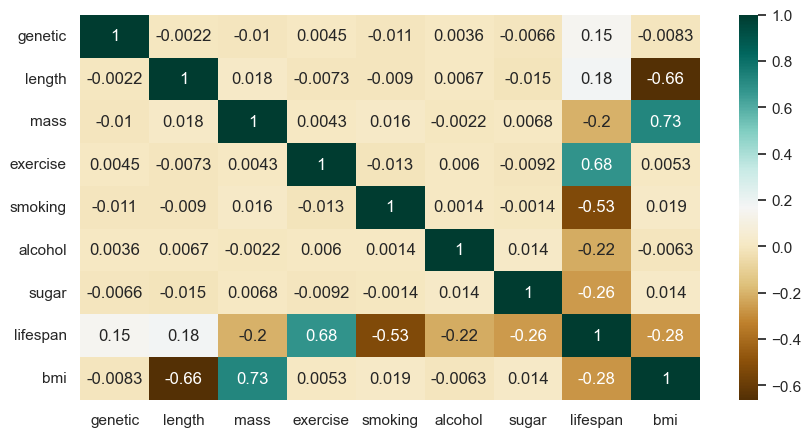

In [27]:



plt.figure(figsize=(10,5))
c= new3.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [30]:
df_corr = new3[['lifespan', 'genetic', 
      'length', 'mass', 
      'exercise', 'smoking',
       'alcohol', 'sugar', 'bmi']].dropna().corr()
df_corr.style.background_gradient(cmap='RdBu')

,lifespan,genetic,length,mass,exercise,smoking,alcohol,sugar,bmi
lifespan,1.000000,0.152144,0.179911,-0.201487,0.677365,-0.525613,-0.216818,-0.263895,-0.276963
genetic,0.152144,1.000000,-0.002151,-0.010059,0.004464,-0.011032,0.003612,-0.006626,-0.008285
length,0.179911,-0.002151,1.000000,0.017750,-0.007252,-0.008966,0.006750,-0.015262,-0.661776
mass,-0.201487,-0.010059,0.017750,1.000000,0.004304,0.016148,-0.002182,0.006780,0.726123
exercise,0.677365,0.004464,-0.007252,0.004304,1.000000,-0.012758,0.005955,-0.009249,0.005278
smoking,-0.525613,-0.011032,-0.008966,0.016148,-0.012758,1.000000,0.001413,-0.001368,0.019498
alcohol,-0.216818,0.003612,0.006750,-0.002182,0.005955,0.001413,1.000000,0.013864,-0.006255
sugar,-0.263895,-0.006626,-0.015262,0.006780,-0.009249,-0.001368,0.013864,1.000000,0.014230
bmi,-0.276963,-0.008285,-0.661776,0.726123,0.005278,0.019498,-0.006255,0.014230,1.000000


<Axes: xlabel='sugar'>

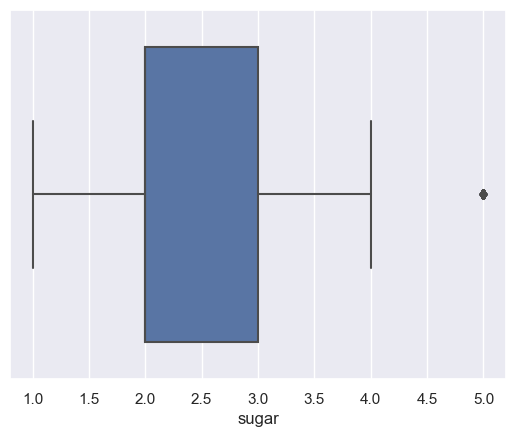

In [10]:
#Got any outliers?
sns.boxplot(x=new3['sugar'])

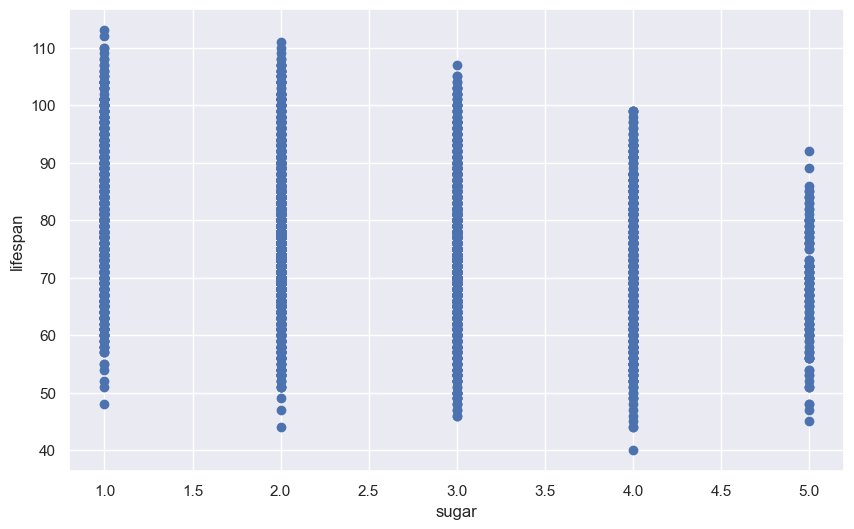

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(new3['sugar'], new3['lifespan'])
ax.set_xlabel('sugar')
ax.set_ylabel('lifespan')
plt.show()

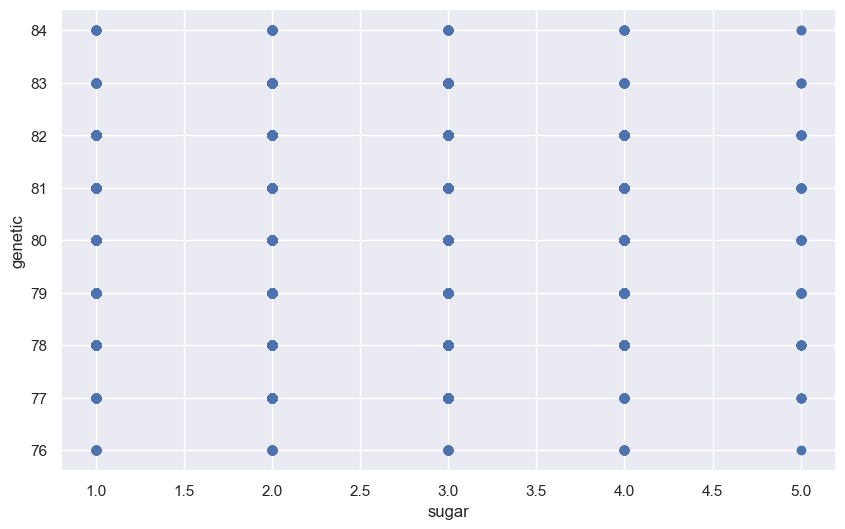

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(new3['sugar'], new3['genetic'])
ax.set_xlabel('sugar')
ax.set_ylabel('genetic')
plt.show()


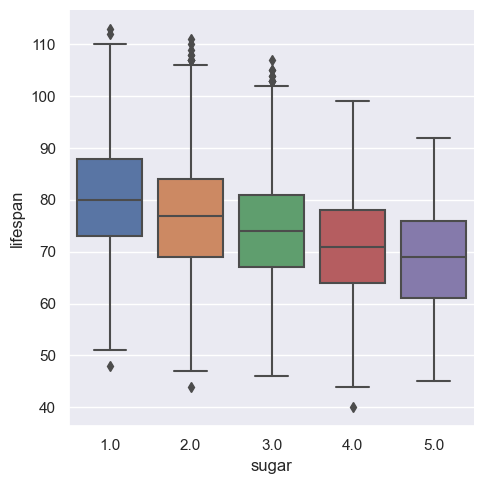

In [15]:
sns.catplot(data=new3, x='sugar', y='lifespan', kind='box')
plt.show()

In [16]:
new_st=new3.groupby('sugar')['lifespan'].describe()
print(new_st)

        count       mean        std   min   25%   50%   75%    max
sugar                                                             
1.0    1368.0  80.507310  10.583556  48.0  73.0  80.0  88.0  113.0
2.0    3188.0  77.256587  10.658608  44.0  69.0  77.0  84.0  111.0
3.0    2557.0  74.497067  10.515902  46.0  67.0  74.0  81.0  107.0
4.0     945.0  71.179894  10.178566  40.0  64.0  71.0  78.0   99.0
5.0     127.0  68.251969   9.866545  45.0  61.0  69.0  76.0   92.0


<Axes: xlabel='exercise', ylabel='lifespan'>

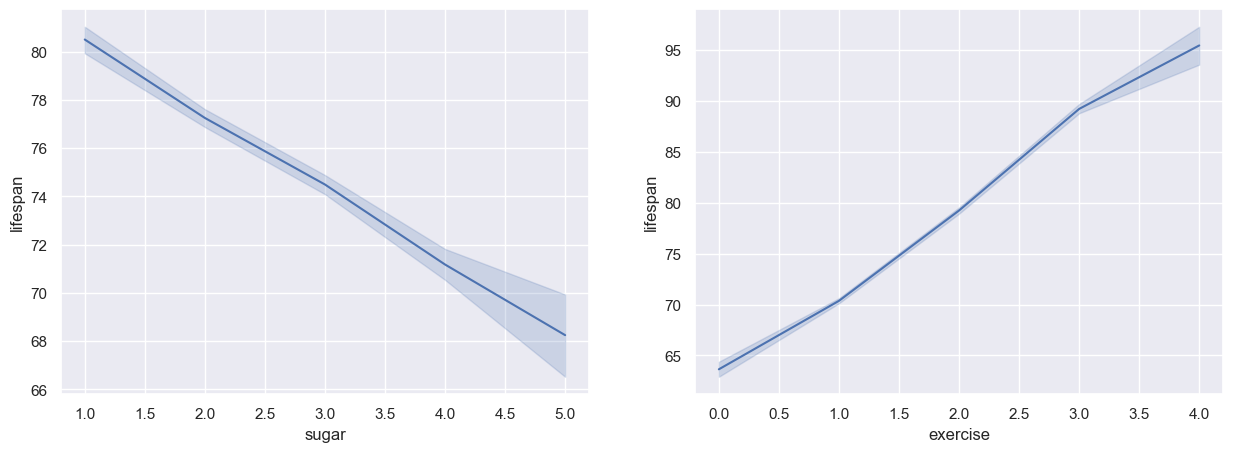

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(new3,x='sugar',y='lifespan', ax=axes[0])
sns.lineplot(new3,x='exercise',y='lifespan',ax=axes[1])

<Axes: xlabel='lifespan', ylabel='exercise'>

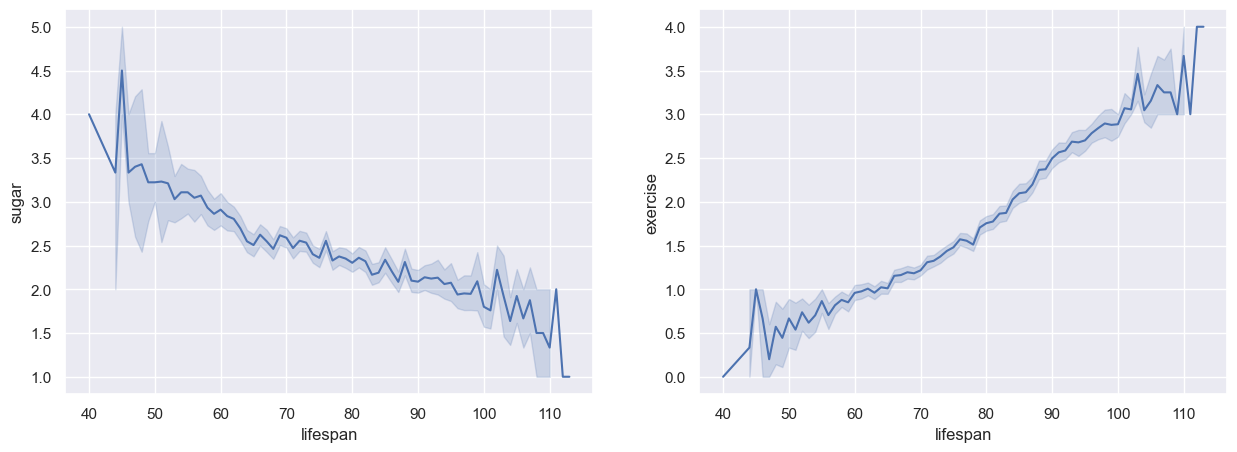

In [21]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(new3,x='lifespan',y='sugar', ax=axes[0])
sns.lineplot(new3,x='lifespan',y='exercise',ax=axes[1])

In [ ]:
!pip install seaborn_qqplot

In [ ]:
sns.pairplot(df)

In [ ]:
g = sns.PairGrid(df)
g.map(sns.lineplot)

In [ ]:
# hieronder vier complete pakketten om een EDA te doen:

In [13]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.2 MB/s eta 0:00:002.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 7.1 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 808.3 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 1.1 MB/s eta 0:00:001.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.3 MB/s eta 0:00:001.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 945.7 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=935a4bbbf5ac63e6db197bc1063b38d61084b5b8d33affd76616f5450e6248d7
  Stored in directory: /home/pans/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098e

In [14]:
#Install the below libaries before importing
# import pandas as pd
#from pandas_profiling import ProfileReport
import ydata_profiling

#EDA using pandas-profiling
profile = ProfileReport(pd.read_csv('data/new2.csv', index_col = 0), explorative=True)

#Saving results to a HTML file
profile.to_file("data/output.html")

/tmp/ipykernel_11763/125457109.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 356.6 kB/s eta 0:00:00m eta 0:00:010:00:02


In [16]:
# import pandas as pd
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(pd.read_csv('data/new2.csv', index_col = 0))

#Saving results to HTML file
sweet_report.show_html('data/sweet_report.html')

/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |      | [  0%]   00:00 -> (? left)

/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .it

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 570.0 kB/s eta 0:00:0031m2.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 821.2 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 296.4 kB/s eta 0:00:001m297.8 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 425.8 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 553.0 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 810.8 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 713.1 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 775.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 664.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458

In [19]:
# import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz('data/new2.csv', index_col = 0)

ModuleNotFoundError: No module named 'channels'

In [20]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 463.8 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 409.7 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 240.7 kB/s eta 0:00:00m eta 0:00:010:00:10
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 256.0 kB/s eta 0:00:001m253.4 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 218.4 kB/s eta 0:00:001m319.7 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 212.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 382.4 kB/s eta 0:00:000:00:01m eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.8/975.8 kB 539.0 kB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 310.5

In [21]:
import dtale
# import pandas as pd

dtale.show(pd.read_csv('data/new2.csv', index_col = 0))